# YEAR 2022
## Income

In [1]:
from salaries import *

person1 = Income(2134, 14, [0.1 * 2300 * 14 / 2]*2, (22 * 11 * 7.63))
person2 = Income(1686, 14, [0.1 * 1850 * 14 / 2]*2, (22 * 11 * 7.63))
both = Income(2134+1686, 14, [0.1 * (2300 + 1850) * 14 / 2]*2, (2 * 22 * 11 * 7.63), 2)

print(f"Gross income 1: {person1.gross()}€ and 2: {person2.gross()}€")

if (singles := person1.net() + person2.net()) > (coupled := both.net()):
    income = singles
    print("Best tax strategy is separated")
else:
    income = coupled
    print("Best tax strategy is coupled")
print(f"After tax income is {income}€")

Gross income 1: 33096€ and 2: 26194€
Best tax strategy is coupled
After tax income is 43694.08€


## Fixed Expenses

In [2]:
rent = 700 * 12
commute = 1400
utilities = 2000
health = 300
groceries = 4500
cleaning = 2625
fitness = 720
fixed = rent + commute + utilities + health + groceries + cleaning + fitness
print(f"{fixed}€")

19945€


## Variable Expenses

In [3]:
eatingout = 3000
car = 900
subscriptions = 79 + Decimal("89.90")  # protonmail and continente deliveries
variable = eatingout + car + subscriptions
print(f"{variable}€")

4068.90€


## Specific allocations

In [4]:
# we allocated each 75€ monthly for free spending
alloc1 = 900
alloc2 = 900

home = 300
entertainment = 300
education = 0
travel = 6000
specific = alloc1 + alloc2 + home + entertainment + education + travel
print(f"{specific}€")

8400€


## Giving

In [5]:
giving = (Decimal(".02") * income).quantize(Decimal("0.01"))  # 2% of net income
print(f"{giving}€")

873.88€


## Monthly effort

Minimum monthly income 2599.65€
43694.08
44568.16


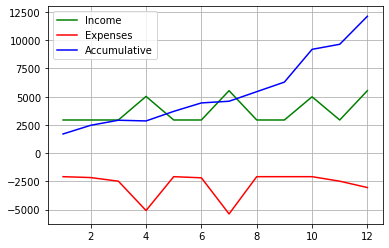

In [6]:
salaries = person1.netsalary() + person2.netsalary()
print(f"Minimum monthly income {salaries}€")

expenses = fixed + variable + specific + giving

# 0-indexed!
yincome = [salaries] * 12
yincome[6] += salaries
yincome[11] += salaries
yincome[3] += person1.netbonus()[0] + person2.netbonus()[0]
yincome[9] += person1.netbonus()[1] + person2.netbonus()[1]

yexpenses = [Decimal((fixed + eatingout + entertainment + alloc1 + alloc2)/12)] * 12

# car
yexpenses[2] += 400
yexpenses[5] += 100
yexpenses[10] += 400
# subscriptions
yexpenses[1] += 79
yexpenses[11] += Decimal("89.90")

yexpenses[6] += home + education

# travel
yexpenses[3] += 3000
yexpenses[6] += 3000
for m in range(0, 12):
    if m == 3 and m == 6:
        yincome[m] += 2 * 11 * Decimal("7.63")
    else:
        yincome[m] += 2 * 22 * Decimal("7.63")

# giving
yexpenses[11] += giving


print(income)
[print(sum(yincome))]
assert sum(yexpenses).quantize(Decimal("0.01")) == expenses

graph = Graph(yincome, yexpenses)
graph.plot()

## Investing

In [7]:
remaining = income - expenses
print(f"Net income: {income}€, expenses: {expenses}€ leaving: {remaining}€")

Net income: 43694.08€, expenses: 33287.78€ leaving: 10406.30€


Given that the lowest point of the year will be January at well above 1k€, I say it's safe to invest ~500 € on a monthly basis. All the tax refund on April will also be invested.

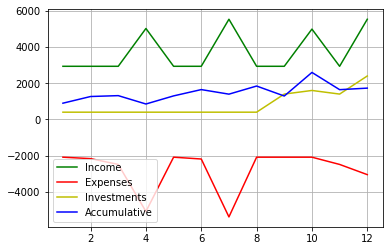

Invested 10000€


In [8]:
yinvested = [400] * 12
yinvested[8] += 1000
yinvested[9] += 1200
yinvested[10] += 1000
yinvested[11] += 2000
graph = Graph(yincome, yexpenses, yinvested)
graph.plot()
print(f"Invested {sum(yinvested)}€")

## IRS return 